# Sentiment Analysis of Pandit Nehru's Speech - A Tryst with Destiny

The first Prime Minister of India, Pandit Jawaharlal Nehru, on the eve of India's independence on August 14, 1947, delivered what is now considered as one of the finest speeches of the 20th century by any statesman.

On August 14, 1947, approaching midnight, Pandit Nehru stood  in front of the Constituent Assembly of free and independent India and spoke these inspirational words -

**"Long years ago, we made a tryst with destiny; and now the time comes when we shall redeem our pledge, not wholly or in full measure, but very substantially. At the stroke of the midnight hour, when the world sleeps, India will awake to life and freedom…."**

This speech is a testament to a time when public oration was a weapon that many politicians and freedom fighters wielded with lethal grace. And it was not only the oratory skills of Pandit Nehru that set this speech apart, but also the nuance and eloquence with which he delivered the patriotic fervour and passionate struggle of the Indian populace, without resorting to jingoism. The hopes and aspirations of a long oppressed people was spoken through a veil of steadfast optimism and cautious pragmatism. 

In this notebook  I have tried to look at his speech from an analytical perspective. Since his speech is an inspiring one, I wondered if a sentiment analysis would reveal the same sentiment. 


## Preface

Sentiment Analysis, quite simply put, is the ability to know if an opinion or a statement was meant to be positive or negative. For example - 

Sentence 1 - "I don't really like that lemon ginger ice tea" \
Sentence 2 - "I love the lemon ginger ice tea" \
Sentence 3 - "Let me think if I want a lemon ginger ice tea" 

Sentence 1 conveys a negative feeling while Sentence 2 conveys a positive feeling and Sentence 3 is neutral. Our brains naturally have the ability to discern a positive statement from a negative statement and we hardly even know when that happens. 

Now imagine that a computer algorithm has the ability to do just that. Imagine if it has the ability to understand the sentiment hidden in a sentence and correctly calls it for what it is - 'positive', 'negative' or 'neutral'. This kind of sentiment identification and classification is what Sentiment Analysis is all about.

It is a set of tools and methods in Natural Language Processing (NLP) that helps us sift through huge troves of customer feedback data, product review data, twitter feed etc., and correctly identify the positive sentiments from the negative sentiments. 

Although Sentiment Analysis is popularly used and optimised for customer feedback/review and twitter analysis, I wanted to try that out for Pandit Nehru's speech. I used the popular Natural Language Processing library, NLTK, for this project.

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import re
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk import pos_tag
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import FreqDist
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from wordcloud import WordCloud
from PIL import Image

### Import Speech as text file

In [2]:
text = open('nehru_speech.txt').read()

### Creating a Helper Function to Clean the Text

In [3]:
def speech_cleaner(text):   
    # Lower Case conversion
    text = text.lower()
    # Tokenize sentences to words
    text = nltk.word_tokenize(text)
    # Remove empty tokens
    text = [w for w in text if len(w) > 0]
    # Remove punctuations
    punct = string.punctuation
    text = [w for w in text if w not in punct]
    # Remove stopwords
    stopword = stopwords.words('english')
    text = [w for w in text if w not in stopword] 
    # POST Tagging the text
    pos_tags = pos_tag(text)
    # Lemmatize the text
    text = [WordNetLemmatizer().lemmatize(w[0]) for w in pos_tags]
    # Removing one letter words
    text = [w for w in text if len(w) > 1]
    # Rejoin all words to get back speech
    speech = " ".join(text)
    return speech

### Creating a Helper Function for Speech semantics

In [4]:
def speech_semantics(text):
    # Lower Case conversion
    text = text.lower()
    # Tokenize the speech into sentences
    text_sentences = nltk.sent_tokenize(text)
    # Tokenize sentences to words
    text = nltk.word_tokenize(text)
    # Remove empty tokens
    text = [w for w in text if len(w) > 0]
    # Remove punctuations
    punct = string.punctuation
    text = [w for w in text if w not in punct]
    # Remove stopwords
    stopword = stopwords.words('english')
    text = [w for w in text if w not in stopword] 
    # POST Tagging the text
    pos_tags = pos_tag(text)
    # Frequency Count for words
    word_freq = FreqDist(text)
    return text_sentences, pos_tags, word_freq

# I. Exploratory Data Analysis

### Total number of words in the speech

In [5]:
# Lower Case conversion
txt = text.lower()
# Tokenize sentences to words
txt = nltk.word_tokenize(txt)
# Remove empty tokens
txt = [w for w in txt if len(w) > 0]
# Remove punctuations
punct = string.punctuation
txt = [w for w in txt if w not in punct]
# Total number of words in speech
print('The number of words in the speech was = ', len(txt))

The number of words in the speech was =  1099


### Most frequently used words in the Speech

In [6]:
speech = speech_cleaner(text)

<Figure size 432x288 with 0 Axes>

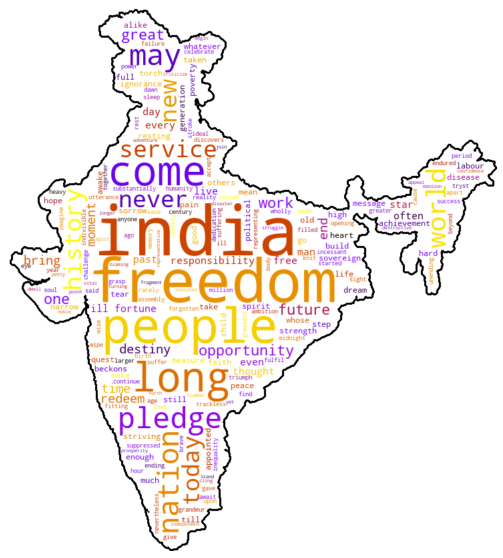

<Figure size 432x288 with 0 Axes>

In [7]:
india_map = np.array(Image.open('india_stencil.png'))
wordcloud = WordCloud(
            background_color='white',
            mask = india_map,
            colormap='gnuplot',
            max_words=200,
            contour_width = 2).generate(speech)

fig, ax = plt.subplots(figsize=[15,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.figure()

In [8]:
speech_sentences, speech_pos, word_count = speech_semantics(text)

In [9]:
# Top 20 most common words featured in the speech
words_in_speech = pd.DataFrame(word_count.most_common(20), columns=['word','count'])
words_in_speech['count%'] = words_in_speech['count'].apply(lambda x: x*100/words_in_speech['count'].sum())

In [10]:
print('The number of times India was mentioned in his speech = ', 
      words_in_speech.loc[words_in_speech['word']=='india','count'].values)
print('The number of times freedom was mentioned in his speech = ', 
      words_in_speech.loc[words_in_speech['word']=='freedom','count'].values)
print('The number of times us was mentioned in his speech = ', 
      words_in_speech.loc[words_in_speech['word']=='us','count'].values)

The number of times India was mentioned in his speech =  [18]
The number of times freedom was mentioned in his speech =  [14]
The number of times us was mentioned in his speech =  [16]


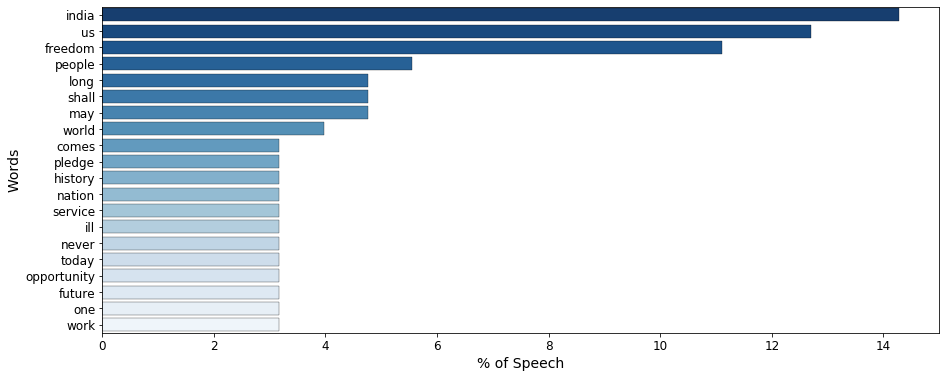

In [11]:
fig,ax = plt.subplots(figsize=[15,6])
sns.barplot(words_in_speech['count%'],words_in_speech['word'],
           palette='Blues_r', edgecolor='k', linewidth='0.3')
ax.set_xlabel('% of Speech', fontsize=14)
ax.set_ylabel('Words', fontsize=14)
ax.tick_params(labelsize=12)

### The lexical categories in the speech

In [12]:
lex_cat = pd.DataFrame(speech_pos, columns=['word','lexical_category'])

In [13]:
lex_cat.loc[lex_cat['word']=='india', 'lexical_category']='NN'

In [14]:
lex_cat_top10 = lex_cat['lexical_category'].value_counts().sort_values(ascending=False).head(10)
print('Top 10 lexical categories in the speech:\n', lex_cat_top10)

Top 10 lexical categories in the speech:
 NN     189
JJ      92
NNS     59
RB      37
VBP     26
VB      21
PRP     16
VBZ     16
VBD     15
MD      14
Name: lexical_category, dtype: int64


**POS_Tags**:

1. NN : Singular Nouns (example: book, Nehru, etc.)
2. NNS: Plural Nouns (example: books, chairs, apples etc.)
3. JJ : Adjective (example: strong)
4. RB : Adverb (example: slowly, warmly etc.)
5. VB : Verb - base form (example: slow, throw etc.)
6. VBZ: Verb - third person singular present (example: fixes, rushes etc.)
7. VBP: Verb - first person singular present (example: chases, talks etc.)
8. VBD: Verb - past tense (example: took, fixed, chased etc.)
9. PRP: Personal Pronoun (example: I, she, he etc.)
10. MD: Modal (example: could, shall, might etc.)

In [15]:
#Collecting Top 5 Nouns
mask = (lex_cat['lexical_category']=='NN')|(lex_cat['lexical_category']=='NNS')
nouns = lex_cat.loc[mask]['word'].value_counts().sort_values(ascending=False).head(5)

#Collecting Top 5 Verbs
mask1 = (lex_cat['lexical_category']=='VB')|(lex_cat['lexical_category']=='VBZ')
mask2 = (lex_cat['lexical_category']=='VBP')|(lex_cat['lexical_category']=='VBD')
verbs = lex_cat.loc[mask1|mask2]['word'].value_counts().sort_values(ascending=False).head(5)

#Collecting Top 5 Adjectives
mask = (lex_cat['lexical_category']=='JJ')
adjectives = lex_cat.loc[mask]['word'].value_counts().sort_values(ascending=False).head(5)

#Collecting Top 5 Adverbs
mask = (lex_cat['lexical_category']=='RB')
adverbs = lex_cat.loc[mask]['word'].value_counts().sort_values(ascending=False).head(5)

#Collecting Top 5 Proper Nouns
mask = (lex_cat['lexical_category']=='PRP')
propers = lex_cat.loc[mask]['word'].value_counts().sort_values(ascending=False).head(5)

#Collecting Top 5 Modalities
mask = (lex_cat['lexical_category']=='MD')
modals = lex_cat.loc[mask]['word'].value_counts().sort_values(ascending=False).head(5)

In [16]:
all_tags = pd.DataFrame([], columns=['word', 'category'])
cat_labels = ['Nouns','Verbs','Adjectives','Adverbs','Proper Nouns','Modal Verbs']
cat = [nouns, verbs, adjectives, adverbs, propers, modals]
for l, c in zip(cat_labels, cat):
    temp = pd.DataFrame(c)
    temp['category'] = l
    all_tags = pd.concat([all_tags, temp],axis=0)

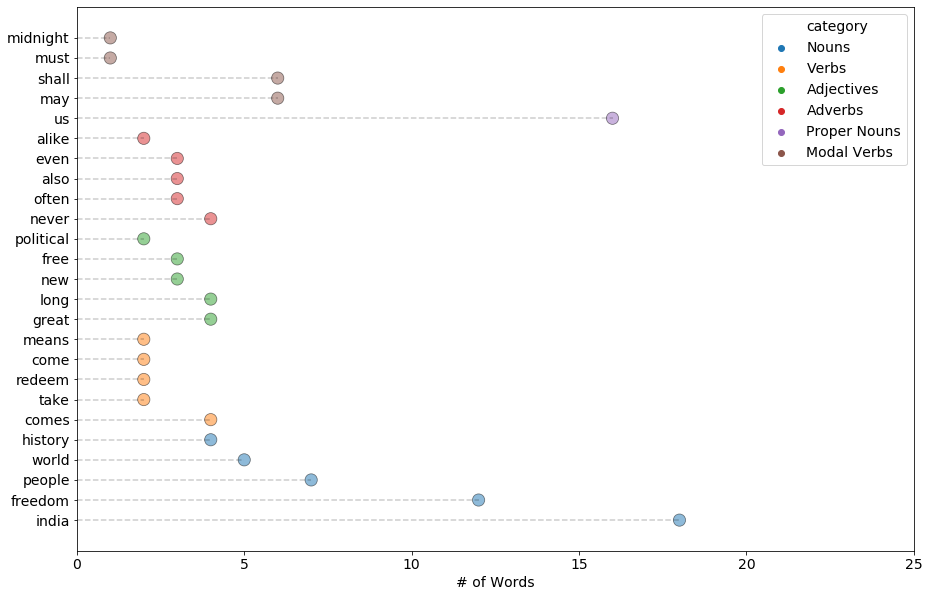

In [17]:
fig,ax = plt.subplots(figsize=[15,10])

for i in all_tags.index:
    ax.hlines(i,0,all_tags.loc[i,'word'], alpha=0.2, linestyle='--')
    
sns.scatterplot(all_tags['word'], all_tags.index,
                hue=all_tags.category,
                s=150, alpha=0.5, edgecolor='k')
ax.tick_params(labelsize=14)
ax.set_xlabel('# of Words', fontsize=14)
ax.set_xlim(0,25)
ax.legend(fontsize=14)

# II. Sentiment Analysis

In [18]:
# Initialising the VADER Sentiment Analyser
sid = SentimentIntensityAnalyzer()

In [19]:
sentence_df = pd.DataFrame({'sentence':speech_sentences})
sentence_df['negative_score'] = sentence_df['sentence'].apply(lambda x:sid.polarity_scores(x)['neg'])
sentence_df['neutral_score'] = sentence_df['sentence'].apply(lambda x:sid.polarity_scores(x)['neu'])
sentence_df['positive_score'] = sentence_df['sentence'].apply(lambda x:sid.polarity_scores(x)['pos'])
sentence_df['compound_score'] = sentence_df['sentence'].apply(lambda x:sid.polarity_scores(x)['compound'])

In [20]:
for i in sentence_df.index:
    if sentence_df['compound_score'][i]<0:
        sentence_df.loc[i, 'sentiment'] = 'Negative'
    elif sentence_df['compound_score'][i]==0:
        sentence_df.loc[i, 'sentiment'] = 'Neutral'
    else :
        sentence_df.loc[i, 'sentiment'] = 'Positive'

In [21]:
sentence_df.head()

,sentence,negative_score,neutral_score,positive_score,compound_score,sentiment
0,"long years ago we made a tryst with destiny, a...",0.000,1.000,0.000,0.0000,Neutral
1,"at the stroke of the midnight hour, when the w...",0.000,0.802,0.198,0.6369,Positive
2,"a moment comes, which comes but rarely in hist...",0.000,1.000,0.000,0.0000,Neutral
3,it is fitting that at this solemn moment we ta...,0.045,0.955,0.000,-0.0964,Negative
4,at the dawn of history india started on her un...,0.083,0.720,0.197,0.6249,Positive


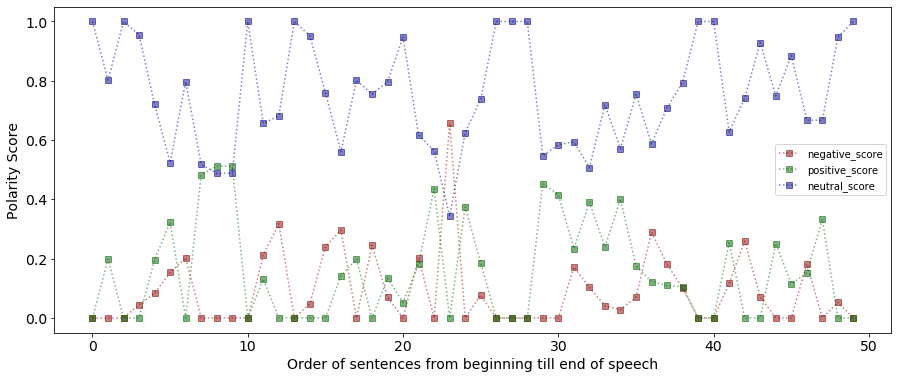

In [22]:
#Plotting the negative, positive and neutral scores

fig,ax = plt.subplots(figsize=[15,6])
sentiment = ['negative_score','positive_score','neutral_score']
colors = ['darkred','darkgreen','darkblue']
for s, c in zip(sentiment, colors):
    ax.plot(sentence_df[s], marker='s',
            color=c, label=s, 
            alpha=0.5, linestyle='dotted')
    ax.legend()
ax.set_xlabel('Order of sentences from beginning till end of speech', fontsize=14)
ax.set_ylabel('Polarity Score', fontsize=14)
ax.tick_params(labelsize=14)

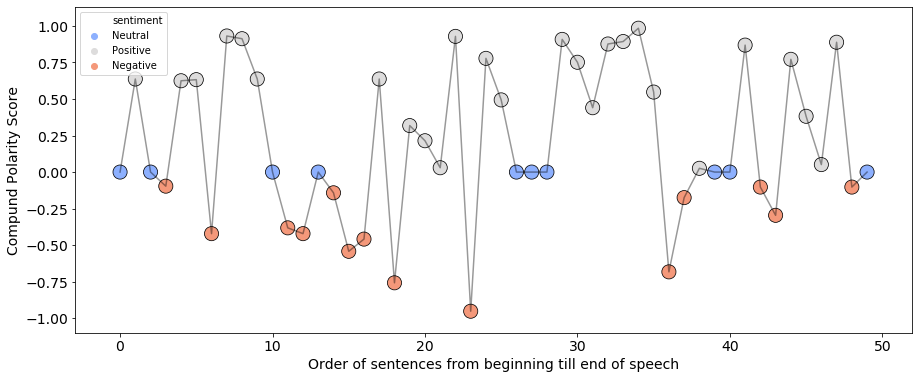

In [23]:
#Plotting the Compund Score

fig,ax = plt.subplots(figsize=[15,6])

sns.lineplot(sentence_df.index, sentence_df.compound_score,
            alpha=0.4, color='k',linestyle='dotted')
sns.scatterplot(sentence_df.index, sentence_df.compound_score, 
             hue=sentence_df.sentiment, palette='coolwarm', s=200, edgecolor='k')


        
ax.set_xlabel('Order of sentences from beginning till end of speech', fontsize=14)
ax.set_ylabel('Compund Polarity Score', fontsize=14)
ax.tick_params(labelsize=14)

In [24]:
sentence_df['sentiment'].value_counts()*100/sentence_df.shape[0]

Positive    52.0
Negative    28.0
Neutral     20.0
Name: sentiment, dtype: float64

In [25]:
print('Total compund score for Pandit Nehru speech = ', sentence_df['compound_score'].sum()/sentence_df.shape[0])

Total compund score for Pandit Nehru speech =  0.21261999999999998
